In [0]:
#install the dependencies
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [21]:
#Load the Data
from google.colab import files
uploaded = files.upload()



In [22]:
#store the data into a data frame
df = pd.read_csv('NFLX.csv')
df.head(6)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-12-16,119.800003,123.000000,118.089996,122.639999,122.639999,13181000
1,2015-12-17,123.970001,126.349998,122.419998,122.510002,122.510002,17284900
2,2015-12-18,120.849998,122.190002,117.919998,118.019997,118.019997,17948100
3,2015-12-21,119.510002,119.589996,115.660004,116.629997,116.629997,11670000
4,2015-12-22,117.300003,117.430000,114.860001,116.239998,116.239998,9689000
5,2015-12-23,116.910004,118.559998,115.779999,118.160004,118.160004,9324300


In [23]:
#Get the number of trading days
df.shape

(1007, 7)

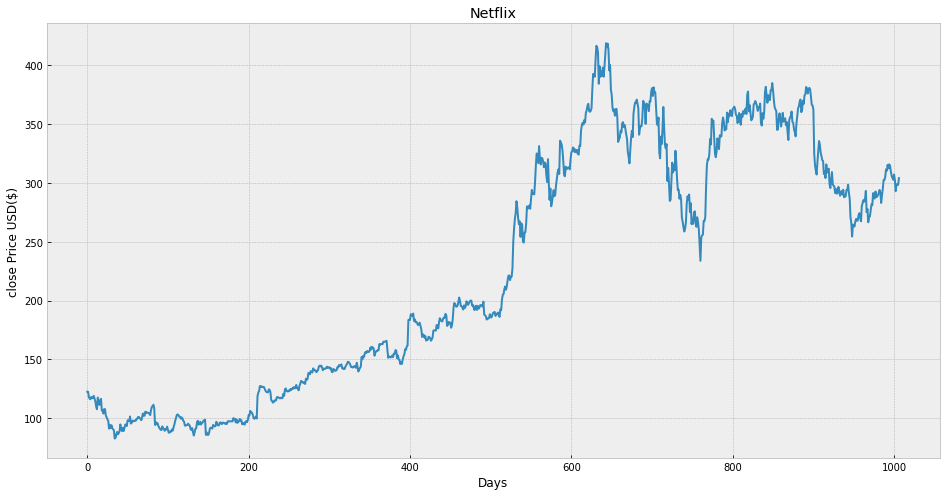

In [24]:
#visualize the close price data 
plt.figure(figsize = (16,8))
plt.title("Netflix")
plt.xlabel('Days')
plt.ylabel('close Price USD($)')
plt.plot(df['Close'])
plt.show()


In [25]:
#get the close price
df = df[['Close']]
df.head(4)

,Close
0,122.639999
1,122.510002
2,118.019997
3,116.629997


In [26]:
#create a variable to predict the 'x' days out into the future
future_days = 25
#create a new column(target) shiftes x units/days up
df["Prediction"] = df[['Close']].shift(-future_days)
df.tail(4)


,Close,Prediction
1003,298.929993,NaN
1004,298.440002,NaN
1005,298.500000,NaN
1006,304.209991,NaN


In [27]:
#create the feature data set((x) and convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'],1))[:-future_days]
print(X)

[[122.639999]
 [122.510002]
 [118.019997]
 [116.629997]
 [116.239998]
 [118.160004]
 [117.330002]
 [117.110001]
 [119.120003]
 [116.709999]
 [114.379997]
 [109.959999]
 [107.660004]
 [117.68    ]
 [114.559998]
 [111.389999]
 [114.970001]
 [116.580002]
 [106.559998]
 [107.059998]
 [104.040001]
 [107.889999]
 [107.739998]
 [102.349998]
 [100.720001]
 [ 99.120003]
 [ 97.830002]
 [ 91.150002]
 [ 94.410004]
 [ 91.839996]
 [ 94.089996]
 [ 91.489998]
 [ 90.739998]
 [ 89.709999]
 [ 82.790001]
 [ 83.32    ]
 [ 86.129997]
 [ 88.449997]
 [ 86.349998]
 [ 87.400002]
 [ 89.050003]
 [ 94.760002]
 [ 90.489998]
 [ 89.230003]
 [ 91.93    ]
 [ 89.120003]
 [ 91.610001]
 [ 94.529999]
 [ 94.790001]
 [ 93.410004]
 [ 98.300003]
 [ 97.610001]
 [ 97.93    ]
 [101.580002]
 [ 95.489998]
 [ 96.230003]
 [ 98.      ]
 [ 97.360001]
 [ 97.660004]
 [ 98.129997]
 [ 97.860001]
 [ 99.349998]
 [ 99.720001]
 [101.120003]
 [101.059998]
 [ 99.839996]
 [ 99.589996]
 [ 98.360001]
 [101.209999]
 [104.129997]
 [102.190002]
 [102.

In [28]:
#Create the target data set(y) and convert it to numpy array and get all of the target values except 
y = np.array(df['Prediction'])[:-future_days]
print(y)

[ 99.120003  97.830002  91.150002  94.410004  91.839996  94.089996
  91.489998  90.739998  89.709999  82.790001  83.32      86.129997
  88.449997  86.349998  87.400002  89.050003  94.760002  90.489998
  89.230003  91.93      89.120003  91.610001  94.529999  94.790001
  93.410004  98.300003  97.610001  97.93     101.580002  95.489998
  96.230003  98.        97.360001  97.660004  98.129997  97.860001
  99.349998  99.720001 101.120003 101.059998  99.839996  99.589996
  98.360001 101.209999 104.129997 102.190002 102.230003 105.699997
 104.349998 104.940002 104.830002 104.449997 103.809998 102.68
 106.980003 109.650002 110.419998 111.510002 108.400002  94.339996
  96.769997  94.980003  95.900002  93.559998  92.43      91.040001
  90.279999  90.029999  93.110001  91.540001  90.790001  89.370003
  90.839996  90.540001  92.889999  90.019997  87.739998  87.879997
  89.120003  88.629997  90.5       89.550003  92.489998  94.889999
  97.889999 100.199997 102.809998 103.300003 102.57     101.510002

In [0]:
#Split the data into 75% training and 25% testing
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size = 0.25)

In [0]:
#Creat the model
#Creat the decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
#creat the linear regression model
lr = LinearRegression().fit(x_train, y_train)

In [34]:
#get the last 'x' of the features data set
x_future = df.drop(['Prediction'],1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[274.459991],
       [270.720001],
       [267.529999],
       [280.480011],
       [282.929993],
       [285.529999],
       [284.25    ],
       [286.279999],
       [293.350006],
       [275.299988],
       [278.049988],
       [266.690002],
       [271.269989],
       [271.5     ],
       [276.820007],
       [281.859985],
       [281.209991],
       [291.450012],
       [287.410004],
       [286.809998],
       [292.859985],
       [288.029999],
       [288.589996],
       [289.570007],
       [291.570007]])

In [36]:
#show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)
print()
#show the model linear regression prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[294.179993 292.01001  283.109985 289.619995 295.029999 311.690002
 302.600006 253.669998 280.480011 310.480011 315.549988 312.48999
 315.929993 314.660004 315.549988 304.320007 304.320007 302.859985
 307.350006 302.5      293.119995 298.929993 298.440002 298.5
 304.209991]

[277.27629204 273.71148801 270.67090982 283.01432653 285.3495482
 287.82776656 286.60772437 288.54263559 295.28147433 278.0769425
 280.69812895 269.87025937 274.23571386 274.45495085 279.52576184
 284.32966076 283.71011332 293.4704785  289.6197097  289.04780876
 294.81440655 290.21066333 290.74442935 291.67853537 293.58485278]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


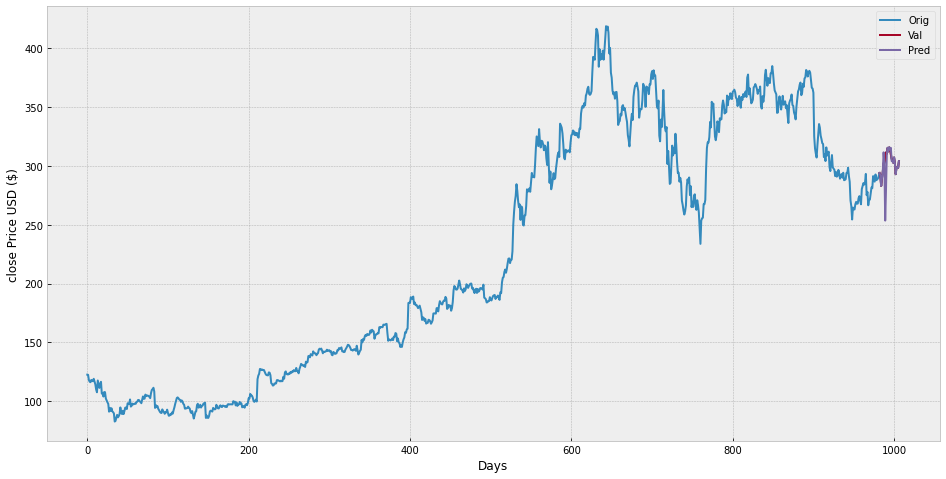

In [37]:
#visualize the data 
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.xlabel('Days')
plt.ylabel('close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val', 'Pred'])
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


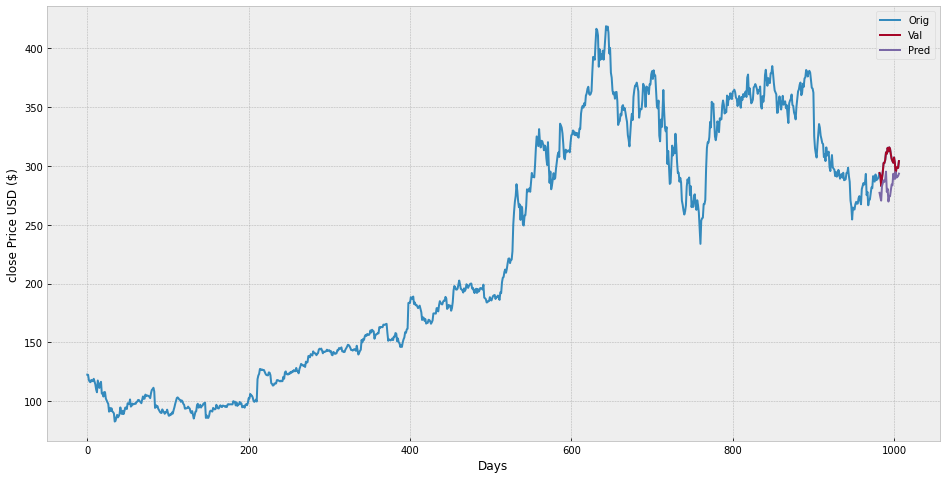

In [38]:
#visualize the data 
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.xlabel('Days')
plt.ylabel('close Price USD ($)')
plt.plot(df['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Orig','Val', 'Pred'])
plt.show()